<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Light_curves_using_Lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
!pip install lightkurve
import lightkurve as lk

     |████████████████████████████████| 247 kB 5.4 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 41 kB 171 kB/s 
     |████████████████████████████████| 4.5 MB 54.1 MB/s 
     |████████████████████████████████| 802 kB 54.7 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.6 MB 41.8 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=5aa91e6dc3fe722f33b7056e907244f6c77251fa21ad01c992b4ca800a3cafe6
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=ba94b3758b032b5f6cbb7d31e63f6f1178591155c7e5b6db88c25ce072547c6c
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12778 s

In [24]:
the_curve=lk.search_lightcurve("kplr011446443", author="Kepler", cadence="long",quarter=(0,1,2,3)).download_all()
the_curve

LightCurveCollection of 4 objects:
    0: <KeplerLightCurve LABEL="KIC 11446443" QUARTER=0 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 11446443" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 11446443" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 11446443" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>

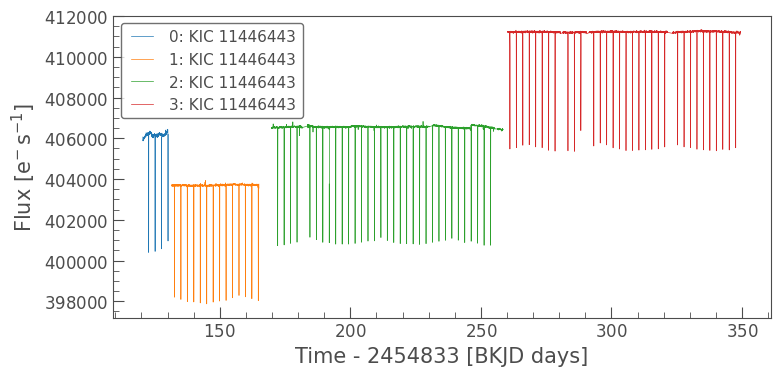

In [25]:
the_curve.plot()